In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import histogram, linspace
from bokeh.plotting import figure, show, output_file
import scipy.stats as sts

%matplotlib inline
%run individual_soln.py





In [2]:
park_1979_1997 = pd.read_excel("../data/changed_parked_data/Annual_All_Report_By_Park_1979_1997.xlsx", skiprows=9)
park_1979_1997.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Columns: 223 entries, Park Name to Average_1979_1997_Misc_Overnights
dtypes: float64(222), object(1)
memory usage: 587.2+ KB


In [3]:
park_1998_2017 = pd.read_excel("../data/changed_parked_data/Annual_All_Report_By_Park_1998_2017.xlsx", skiprows=9)
park_1998_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Columns: 234 entries, Park Name to Average_1998_2017_Misc_Overnights
dtypes: float64(222), int64(11), object(1)
memory usage: 692.9+ KB


**Initial Analysis of the data revealed that there were (378-336 = 42) new parks added after 1997**

In [4]:
park_1979_1997.head(5)

,Park Name,1979_Recreational_Visits,1980_Recreational_Visits,1981_Recreational_Visits,1982_Recreational_Visits,1983_Recreational_Visits,1984_Recreational_Visits,1985_Recreational_Visits,1986_Recreational_Visits,1987_Recreational_Visits,...,1989_Misc_Overnights,1990_Misc_Overnights,1991_Misc_Overnights,1992_Misc_Overnights,1993_Misc_Overnights,1994_Misc_Overnights,1995_Misc_Overnights,1996_Misc_Overnights,1997_Misc_Overnights,Average_1979_1997_Misc_Overnights
0,Abraham Lincoln Birthplace NHP,271231.0,239074.0,252245.0,318707.0,256126.0,258023.0,264905.0,280620.0,292825.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Acadia NP,2787366.0,2779666.0,2997972.0,3572114.0,4124639.0,3734763.0,3745570.0,3929054.0,4288154.0,...,0.0,9748.0,9581.0,9796.0,10518.0,10511.0,10476.0,9512.0,10286.0,4233.052632
2,Adams NHP,34322.0,24974.0,27055.0,25440.0,26162.0,23398.0,24555.0,24693.0,25617.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,Agate Fossil Beds NM,8115.0,8330.0,9459.0,9018.0,10097.0,10317.0,10366.0,10187.0,11439.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,Alibates Flint Quarries NM,1922.0,2211.0,2384.0,2398.0,1919.0,2251.0,2200.0,2202.0,2494.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [5]:
park_1998_2017.head(5)

,Park Name,1998_Recreational_Visits,1999_Recreational_Visits,2000_Recreational_Visits,2001_Recreational_Visits,2002_Recreational_Visits,2003_Recreational_Visits,2004_Recreational_Visits,2005_Recreational_Visits,2006_Recreational_Visits,...,2009_Misc_Overnights,2010_Misc_Overnights,2011_Misc_Overnights,2012_Misc_Overnights,2013_Misc_Overnights,2014_Misc_Overnights,2015_Misc_Overnights,2016_Misc_Overnights,2017_Misc_Overnights,Average_1998_2017_Misc_Overnights
0,Abraham Lincoln Birthplace NHP,250842.0,251204.0,236180.0,229675.0,250772.0,211650.0,201828.0,190809.0,200054.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,Acadia NP,2594497.0,2602227.0,2469238.0,2516551.0,2558572.0,2431062.0,2207847.0,2051484.0,2083588.0,...,7212.0,8549.0,7243.0,8083.0,7047.0,8474.0,8343.0,8563.0,10889,8608.1
2,Adams NHP,63569.0,84574.0,87347.0,167500.0,173944.0,215659.0,239504.0,220467.0,225318.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,African Burial Ground NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,Agate Fossil Beds NM,17594.0,18117.0,17933.0,17399.0,17129.0,16233.0,15235.0,14209.0,13521.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [6]:
park_names_1998_2017 = park_1998_2017['Park Name'] 
park_names_1979_1997 = park_1979_1997['Park Name']
len(set(park_names_1979_1997))


337

In [7]:
len(set(park_names_1998_2017))

379

In [8]:
all_parks = set(park_names_1998_2017) | set(park_names_1979_1997)
len(all_parks)
print("Total parks when datasets are combinbed: {}".format(len(all_parks)))


Total parks when datasets are combinbed: 379


In [9]:
merged_dataset = pd.merge(park_1998_2017, park_1979_1997, on=['Park Name'],how='outer')
merged_dataset.shape

(379, 456)

In [10]:
merged_dataset

,Park Name,1998_Recreational_Visits,1999_Recreational_Visits,2000_Recreational_Visits,2001_Recreational_Visits,2002_Recreational_Visits,2003_Recreational_Visits,2004_Recreational_Visits,2005_Recreational_Visits,2006_Recreational_Visits,...,1989_Misc_Overnights,1990_Misc_Overnights,1991_Misc_Overnights,1992_Misc_Overnights,1993_Misc_Overnights,1994_Misc_Overnights,1995_Misc_Overnights,1996_Misc_Overnights,1997_Misc_Overnights,Average_1979_1997_Misc_Overnights
0,Abraham Lincoln Birthplace NHP,250842.0,251204.0,236180.0,229675.0,250772.0,211650.0,201828.0,190809.0,200054.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Acadia NP,2594497.0,2602227.0,2469238.0,2516551.0,2558572.0,2431062.0,2207847.0,2051484.0,2083588.0,...,0.0,9748.0,9581.0,9796.0,10518.0,10511.0,10476.0,9512.0,10286.0,4233.052632
2,Adams NHP,63569.0,84574.0,87347.0,167500.0,173944.0,215659.0,239504.0,220467.0,225318.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,African Burial Ground NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Agate Fossil Beds NM,17594.0,18117.0,17933.0,17399.0,17129.0,16233.0,15235.0,14209.0,13521.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,Alibates Flint Quarries NM,3293.0,3047.0,3131.0,2456.0,2125.0,1811.0,2012.0,2919.0,1882.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6,Allegheny Portage Railroad NHS,111100.0,111391.0,133396.0,142340.0,146484.0,129995.0,126441.0,115357.0,121009.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.000000
7,Amistad NRA,1129811.0,1164166.0,1234506.0,1097650.0,1047784.0,1071199.0,1445772.0,1399852.0,1599271.0,...,4003.0,3143.0,3255.0,2970.0,2504.0,2683.0,1138.0,736.0,1569.0,2026.315789
8,Andersonville NHS,225653.0,182539.0,167373.0,160974.0,190004.0,150661.0,165929.0,132466.0,132153.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9,Andrew Johnson NHS,60207.0,51779.0,59897.0,49551.0,48878.0,51910.0,50196.0,48552.0,50701.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [11]:
'''
Use regex match to get the column names for all the data
\d+_Recreational_Visits along with Park Name
'''
recreational_visits = merged_dataset.filter(regex=("(\d+_Recreational_Visits)|(Park)"))
recreational_visits.columns

Index(['Park Name', '1998_Recreational_Visits', '1999_Recreational_Visits',
       '2000_Recreational_Visits', '2001_Recreational_Visits',
       '2002_Recreational_Visits', '2003_Recreational_Visits',
       '2004_Recreational_Visits', '2005_Recreational_Visits',
       '2006_Recreational_Visits', '2007_Recreational_Visits',
       '2008_Recreational_Visits', '2009_Recreational_Visits',
       '2010_Recreational_Visits', '2011_Recreational_Visits',
       '2012_Recreational_Visits', '2013_Recreational_Visits',
       '2014_Recreational_Visits', '2015_Recreational_Visits',
       '2016_Recreational_Visits', '2017_Recreational_Visits',
       'Average_1998_2017_Recreational_Visits', '1979_Recreational_Visits',
       '1980_Recreational_Visits', '1981_Recreational_Visits',
       '1982_Recreational_Visits', '1983_Recreational_Visits',
       '1984_Recreational_Visits', '1985_Recreational_Visits',
       '1986_Recreational_Visits', '1987_Recreational_Visits',
       '1988_Recreational_Vis

In [12]:
'''
Use regex match to get the column names for all the data
\d+_Non_Recreational_Visits along with Park Name
'''
non_recreational_visits = merged_dataset.filter(regex=("(\d+_Non_Recreational_Visits)|(Park)"))
non_recreational_visits.columns

Index(['Park Name', '1998_Non_Recreational_Visits',
       '1999_Non_Recreational_Visits', '2000_Non_Recreational_Visits',
       '2001_Non_Recreational_Visits', '2002_Non_Recreational_Visits',
       '2003_Non_Recreational_Visits', '2004_Non_Recreational_Visits',
       '2005_Non_Recreational_Visits', '2006_Non_Recreational_Visits',
       '2007_Non_Recreational_Visits', '2008_Non_Recreational_Visits',
       '2009_Non_Recreational_Visits', '2010_Non_Recreational_Visits',
       '2011_Non_Recreational_Visits', '2012_Non_Recreational_Visits',
       '2013_Non_Recreational_Visits', '2014_Non_Recreational_Visits',
       '2015_Non_Recreational_Visits', '2016_Non_Recreational_Visits',
       '2017_Non_Recreational_Visits',
       'Average_1998_2017_Non_Recreational_Visits',
       '1979_Non_Recreational_Visits', '1980_Non_Recreational_Visits',
       '1981_Non_Recreational_Visits', '1982_Non_Recreational_Visits',
       '1983_Non_Recreational_Visits', '1984_Non_Recreational_Visits',
     

In [13]:
'''
Use regex match to get the column names for all the data
\d+_Misc_Overnights along with Park Name
'''
misc_overnights = merged_dataset.filter(regex=("(\d+_Misc_Overnights)|(Park)"))
misc_overnights.columns

Index(['Park Name', '1998_Misc_Overnights', '1999_Misc_Overnights',
       '2000_Misc_Overnights', '2001_Misc_Overnights', '2002_Misc_Overnights',
       '2003_Misc_Overnights', '2004_Misc_Overnights', '2005_Misc_Overnights',
       '2006_Misc_Overnights', '2007_Misc_Overnights', '2008_Misc_Overnights',
       '2009_Misc_Overnights', '2010_Misc_Overnights', '2011_Misc_Overnights',
       '2012_Misc_Overnights', '2013_Misc_Overnights', '2014_Misc_Overnights',
       '2015_Misc_Overnights', '2016_Misc_Overnights', '2017_Misc_Overnights',
       'Average_1998_2017_Misc_Overnights', '1979_Misc_Overnights',
       '1980_1979_1997_Misc_Overnights', '1981_Misc_Overnights',
       '1982_Misc_Overnights', '1983_Misc_Overnights', '1984_Misc_Overnights',
       '1985_Misc_Overnights', '1986_Misc_Overnights', '1987_Misc_Overnights',
       '1988_Misc_Overnights', '1989_Misc_Overnights', '1990_Misc_Overnights',
       '1991_Misc_Overnights', '1992_Misc_Overnights', '1993_Misc_Overnights',
       '1

In [14]:
'''
Use regex match to get the column names for all the data
\d+_Concessioner_Camping along with Park Name
'''
concessioner_camping = merged_dataset.filter(regex=("(\d+_Concessioner_Camping)|(Park)"))
concessioner_camping.columns

Index(['Park Name', '1998_Concessioner_Camping', '1999_Concessioner_Camping',
       '2000_Concessioner_Camping', '2001_Concessioner_Camping',
       '2002_Concessioner_Camping', '2003_Concessioner_Camping',
       '2004_Concessioner_Camping', '2005_Concessioner_Camping',
       '2006_Concessioner_Camping', '2007_Concessioner_Camping',
       '2008_Concessioner_Camping', '2009_Concessioner_Camping',
       '2010_Concessioner_Camping', '2011_Concessioner_Camping',
       '2012_Concessioner_Camping', '2013_Concessioner_Camping',
       '2014_Concessioner_Camping', '2015_Concessioner_Camping',
       '2016_Concessioner_Camping', '2017_Concessioner_Camping',
       'Average_1998_2017_Concessioner_Camping', '1979_Concessioner_Camping',
       '1980_Concessioner_Camping', '1981_Concessioner_Camping',
       '1982_Concessioner_Camping', '1983_Concessioner_Camping',
       '1984_Concessioner_Camping', '1985_Concessioner_Camping',
       '1986_Concessioner_Camping', '1987_Concessioner_Camping',

In [15]:

'''
Use regex match to get the column names for all the data
\d+_Tent_Overnights along with Park Name
'''
tent_overnights = merged_dataset.filter(regex=("(\d+_Tent_Overnights)|(Park)"))
tent_overnights.columns

Index(['Park Name', '1998_Tent_Overnights', '1999_Tent_Overnights',
       '2000_Tent_Overnights', '2001_Tent_Overnights', '2002_Tent_Overnights',
       '2003_Tent_Overnights', '2004_Tent_Overnights', '2005_Tent_Overnights',
       '2006_Tent_Overnights', '2007_Tent_Overnights', '2008_Tent_Overnights',
       '2009_Tent_Overnights', '2010_Tent_Overnights', '2011_Tent_Overnights',
       '2012_Tent_Overnights', '2013_Tent_Overnights', '2014_Tent_Overnights',
       '2015_Tent_Overnights', '2016_Tent_Overnights', '2017_Tent_Overnights',
       'Average_1998_2017_Tent_Overnights', '1979_Tent_Overnights',
       '1980_Tent_Overnights', '1981_Tent_Overnights', '1982_Tent_Overnights',
       '1983_Tent_Overnights', '1984_Tent_Overnights', '1985_Tent_Overnights',
       '1986_Tent_Overnights', '1987_Tent_Overnights', '1988_Tent_Overnights',
       '1989_Tent_Overnights', '1990_Tent_Overnights', '1991_Tent_Overnights',
       '1992_Tent_Overnights', '1993_Tent_Overnights', '1994_Tent_Overnigh

In [16]:

'''
Use regex match to get the column names for all the data
\d+_RV_Overnights along with Park Name
'''
rv_overnights = merged_dataset.filter(regex=("(\d+_RV_Overnights)|(Park)"))
rv_overnights.columns


Index(['Park Name', '1998_RV_Overnights', '1999_RV_Overnights',
       '2000_RV_Overnights', '2001_RV_Overnights', '2002_RV_Overnights',
       '2003_RV_Overnights', '2004_RV_Overnights', '2005_RV_Overnights',
       '2006_RV_Overnights', '2007_RV_Overnights', '2008_RV_Overnights',
       '2009_RV_Overnights', '2010_RV_Overnights', '2011_RV_Overnights',
       '2012_RV_Overnights', '2013_RV_Overnights', '2014_RV_Overnights',
       '2015_RV_Overnights', '2016_RV_Overnights', '2017_RV_Overnights',
       '1979_RV_Overnights', '1980_1979_1997_RV_Overnights',
       '1981_RV_Overnights', '1982_RV_Overnights', '1983_RV_Overnights',
       '1984_RV_Overnights', '1985_RV_Overnights', '1986_RV_Overnights',
       '1987_RV_Overnights', '1988_RV_Overnights', '1989_RV_Overnights',
       '1990_RV_Overnights', '1991_RV_Overnights', '1992_RV_Overnights',
       '1993_RV_Overnights', '1994_RV_Overnights', '1995_RV_Overnights',
       '1996_RV_Overnights', '1997_RV_Overnights'],
      dtype='object'

In [17]:

'''
Use regex match to get the column names for all the data
\d+_BackCountry_Overnights along with Park Name
'''
backcountry_overnights = merged_dataset.filter(regex=("(\d+_BackCountry_Overnights)|(Park)"))
backcountry_overnights.columns

Index(['Park Name', '1979_BackCountry_Overnights',
       '1980_BackCountry_Overnights', '1981_BackCountry_Overnights',
       '1982_BackCountry_Overnights', '1983_BackCountry_Overnights',
       '1984_BackCountry_Overnights', '1985_BackCountry_Overnights',
       '1986_BackCountry_Overnights', '1987_BackCountry_Overnights',
       '1988_BackCountry_Overnights', '1989_BackCountry_Overnights',
       '1990_BackCountry_Overnights', '1991_BackCountry_Overnights',
       '1992_BackCountry_Overnights', '1993_BackCountry_Overnights',
       '1994_BackCountry_Overnights', '1995_BackCountry_Overnights',
       '1996_BackCountry_Overnights', '1997_BackCountry_Overnights',
       'Average_1979_1997_BackCountry_Overnights'],
      dtype='object')

In [18]:

'''
Use regex match to get the column names for all the data
\d+_Non_Recreational_Overnights along with Park Name
'''
non_recreational_overnights = merged_dataset.filter(regex=("(\d+_Non_Recreational_Overnights)|(Park)"))
non_recreational_overnights.columns

Index(['Park Name', '1998_Non_Recreational_Overnights',
       '1999_Non_Recreational_Overnights', '2000_Non_Recreational_Overnights',
       '2001_Non_Recreational_Overnights', '2002_Non_Recreational_Overnights',
       '2003_Non_Recreational_Overnights', '2004_Non_Recreational_Overnights',
       '2005_Non_Recreational_Overnights', '2006_Non_Recreational_Overnights',
       '2007_Non_Recreational_Overnights', '2008_Non_Recreational_Overnights',
       '2009_Non_Recreational_Overnights', '2010_Non_Recreational_Overnights',
       '2011_Non_Recreational_Overnights', '2012_Non_Recreational_Overnights',
       '2013_Non_Recreational_Overnights', '2014_Non_Recreational_Overnights',
       '2015_Non_Recreational_Overnights', '2016_Non_Recreational_Overnights',
       '2017_Non_Recreational_Overnights',
       'Average_1998_2017_Non_Recreational_Overnights',
       '1979_Non_Recreational_Overnights', '1980_Non_Recreational_Overnights',
       '1981_Non_Recreational_Overnights', '1982_Non_Re

In [19]:
'''
Use regex match to get the column names for all the data
\d+_Non_Recreational_Hours along with Park Name
'''
non_recreational_hours = merged_dataset.filter(regex=("(\d+_Non_Recreational_Hours)|(Park)"))
non_recreational_hours.columns

Index(['Park Name', '1998_Non_Recreational_Hours',
       '1999_Non_Recreational_Hours', '2000_Non_Recreational_Hours',
       '2001_Non_Recreational_Hours', '2002_Non_Recreational_Hours',
       '2003_Non_Recreational_Hours', '2004_Non_Recreational_Hours',
       '2005_Non_Recreational_Hours', '2006_Non_Recreational_Hours',
       '2007_Non_Recreational_Hours', '2008_Non_Recreational_Hours',
       '2009_Non_Recreational_Hours', '2010_Non_Recreational_Hours',
       '2011_Non_Recreational_Hours', '2012_Non_Recreational_Hours',
       '2013_Non_Recreational_Hours', '2014_Non_Recreational_Hours',
       '2015_Non_Recreational_Hours', '2016_Non_Recreational_Hours',
       '2017_Non_Recreational_Hours',
       'Average_1998_2017_Non_Recreational_Hours',
       '1979_Non_Recreational_Hours', '1980_Non_Recreational_Hours',
       '1981_Non_Recreational_Hours', '1982_Non_Recreational_Hours',
       '1983_Non_Recreational_Hours', '1984_Non_Recreational_Hours',
       '1985_Non_Recreational_Ho

In [20]:
'''
Use regex match to get the column names for all the data
\d+_Recreational_Hours along with Park Name
'''
recreational_hours = merged_dataset.filter(regex=("(\d+_Recreational_Hours)|(Park)"))
recreational_hours.columns

Index(['Park Name', '1998_Recreational_Hours', '1999_Recreational_Hours',
       '2000_Recreational_Hours', '2001_Recreational_Hours',
       '2002_Recreational_Hours', '2003_Recreational_Hours',
       '2004_Recreational_Hours', '2005_Recreational_Hours',
       '2006_Recreational_Hours', '2007_Recreational_Hours',
       '2008_Recreational_Hours', '2009_Recreational_Hours',
       '2010_Recreational_Hours', '2011_Recreational_Hours',
       '2012_Recreational_Hours', '2013_Recreational_Hours',
       '2014_Recreational_Hours', '2015_Recreational_Hours',
       '2016_Recreational_Hours', '2017_Recreational_Hours',
       'Average_1998_2017_Recreational_Hours', '1979_Recreational_Hours',
       '1980_Recreational_Hours', '1981_Recreational_Hours',
       '1982_Recreational_Hours', '1983_Recreational_Hours',
       '1984_Recreational_Hours', '1985_Recreational_Hours',
       '1986_Recreational_Hours', '1987_Recreational_Hours',
       '1988_Recreational_Hours', '1989_Recreational_Hours'

In [21]:
recreational_hours.shape

(379, 42)

In [22]:
non_recreational_hours.shape

(379, 42)

In [23]:
non_recreational_overnights.shape

(379, 42)

In [24]:
tent_overnights.shape

(379, 42)

In [25]:
tent_overnights.head(5)

,Park Name,1998_Tent_Overnights,1999_Tent_Overnights,2000_Tent_Overnights,2001_Tent_Overnights,2002_Tent_Overnights,2003_Tent_Overnights,2004_Tent_Overnights,2005_Tent_Overnights,2006_Tent_Overnights,...,1989_Tent_Overnights,1990_Tent_Overnights,1991_Tent_Overnights,1992_Tent_Overnights,1993_Tent_Overnights,1994_Tent_Overnights,1995_Tent_Overnights,1996_Tent_Overnights,1997_Tent_Overnights,Average_1979_1997_Tent_Overnights
0,Abraham Lincoln Birthplace NHP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Acadia NP,135507.0,125046.0,114033.0,118545.0,122340.0,117369.0,101577.0,85815.0,96252.0,...,173909.0,126135.0,140760.0,128478.0,130287.0,129483.0,129351.0,108939.0,115935.0,146544.631579
2,Adams NHP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,African Burial Ground NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Agate Fossil Beds NM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [26]:
recreational_visits.head(5)

,Park Name,1998_Recreational_Visits,1999_Recreational_Visits,2000_Recreational_Visits,2001_Recreational_Visits,2002_Recreational_Visits,2003_Recreational_Visits,2004_Recreational_Visits,2005_Recreational_Visits,2006_Recreational_Visits,...,1989_Recreational_Visits,1990_Recreational_Visits,1991_Recreational_Visits,1992_Recreational_Visits,1993_Recreational_Visits,1994_Recreational_Visits,1995_Recreational_Visits,1996_Recreational_Visits,1997_Recreational_Visits,Average_1979_1997_Recreational_Visits
0,Abraham Lincoln Birthplace NHP,250842.0,251204.0,236180.0,229675.0,250772.0,211650.0,201828.0,190809.0,200054.0,...,309823.0,307669.0,316945.0,302739.0,293710.0,279542.0,268509.0,249344.0,262889.0,2.796447e+05
1,Acadia NP,2594497.0,2602227.0,2469238.0,2516551.0,2558572.0,2431062.0,2207847.0,2051484.0,2083588.0,...,5440952.0,2339591.0,2475857.0,2382113.0,2656034.0,2710749.0,2845378.0,2704831.0,2760306.0,3.304073e+06
2,Adams NHP,63569.0,84574.0,87347.0,167500.0,173944.0,215659.0,239504.0,220467.0,225318.0,...,22595.0,20315.0,26958.0,27400.0,43877.0,41179.0,47312.0,38230.0,56643.0,3.064958e+04
3,African Burial Ground NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Agate Fossil Beds NM,17594.0,18117.0,17933.0,17399.0,17129.0,16233.0,15235.0,14209.0,13521.0,...,11459.0,14482.0,13891.0,18785.0,19467.0,18970.0,18719.0,16567.0,20596.0,1.323263e+04


In [27]:
recreational_visits.shape

(379, 42)

In [28]:
yosemite = recreational_visits[recreational_visits['Park Name'] == 'Yosemite NP']
yosemite

,Park Name,1998_Recreational_Visits,1999_Recreational_Visits,2000_Recreational_Visits,2001_Recreational_Visits,2002_Recreational_Visits,2003_Recreational_Visits,2004_Recreational_Visits,2005_Recreational_Visits,2006_Recreational_Visits,...,1989_Recreational_Visits,1990_Recreational_Visits,1991_Recreational_Visits,1992_Recreational_Visits,1993_Recreational_Visits,1994_Recreational_Visits,1995_Recreational_Visits,1996_Recreational_Visits,1997_Recreational_Visits,Average_1979_1997_Recreational_Visits
376,Yosemite NP,3657132.0,3493607.0,3400903.0,3368731.0,3361867.0,3378664.0,3280911.0,3304144.0,3242644.0,...,3308159.0,3124939.0,3423101.0,3819518.0,3839645.0,3962117.0,3958406.0,4046207.0,3669970.0,3.168377e+06


In [29]:
yosemite_new = yosemite.drop(columns=['Average_1998_2017_Recreational_Visits', 'Average_1979_1997_Recreational_Visits'])
yosemite_new

,Park Name,1998_Recreational_Visits,1999_Recreational_Visits,2000_Recreational_Visits,2001_Recreational_Visits,2002_Recreational_Visits,2003_Recreational_Visits,2004_Recreational_Visits,2005_Recreational_Visits,2006_Recreational_Visits,...,1988_Recreational_Visits,1989_Recreational_Visits,1990_Recreational_Visits,1991_Recreational_Visits,1992_Recreational_Visits,1993_Recreational_Visits,1994_Recreational_Visits,1995_Recreational_Visits,1996_Recreational_Visits,1997_Recreational_Visits
376,Yosemite NP,3657132.0,3493607.0,3400903.0,3368731.0,3361867.0,3378664.0,3280911.0,3304144.0,3242644.0,...,3216681.0,3308159.0,3124939.0,3423101.0,3819518.0,3839645.0,3962117.0,3958406.0,4046207.0,3669970.0


In [30]:
yosemite_new = yosemite_new.reindex(sorted(yosemite_new.columns), axis=1)

In [31]:
yosemite_new

,1979_Recreational_Visits,1980_Recreational_Visits,1981_Recreational_Visits,1982_Recreational_Visits,1983_Recreational_Visits,1984_Recreational_Visits,1985_Recreational_Visits,1986_Recreational_Visits,1987_Recreational_Visits,1988_Recreational_Visits,...,2009_Recreational_Visits,2010_Recreational_Visits,2011_Recreational_Visits,2012_Recreational_Visits,2013_Recreational_Visits,2014_Recreational_Visits,2015_Recreational_Visits,2016_Recreational_Visits,2017_Recreational_Visits,Park Name
376,2350782.0,2490282.0,2516893.0,2415587.0,2457464.0,2738467.0,2831952.0,2876717.0,3152275.0,3216681.0,...,3737472.0,3901408.0,3951393.0,3853404.0,3691191.0,3882642.0,4150217.0,5028868.0,4336890,Yosemite NP


In [32]:
yosemite_new_transpose = yosemite_new.transpose()
yosemite_new_transpose

,376
1979_Recreational_Visits,2.35078e+06
1980_Recreational_Visits,2.49028e+06
1981_Recreational_Visits,2.51689e+06
1982_Recreational_Visits,2.41559e+06
1983_Recreational_Visits,2.45746e+06
1984_Recreational_Visits,2.73847e+06
1985_Recreational_Visits,2.83195e+06
1986_Recreational_Visits,2.87672e+06
1987_Recreational_Visits,3.15228e+06
1988_Recreational_Visits,3.21668e+06


In [33]:
y1 = yosemite_new.pivot_table(yosemite_new,index=["Yosemite NP"])
y1

,1979_Recreational_Visits,1980_Recreational_Visits,1981_Recreational_Visits,1982_Recreational_Visits,1983_Recreational_Visits,1984_Recreational_Visits,1985_Recreational_Visits,1986_Recreational_Visits,1987_Recreational_Visits,1988_Recreational_Visits,...,2008_Recreational_Visits,2009_Recreational_Visits,2010_Recreational_Visits,2011_Recreational_Visits,2012_Recreational_Visits,2013_Recreational_Visits,2014_Recreational_Visits,2015_Recreational_Visits,2016_Recreational_Visits,2017_Recreational_Visits
Yosemite NP,2350782.0,2490282.0,2516893.0,2415587.0,2457464.0,2738467.0,2831952.0,2876717.0,3152275.0,3216681.0,...,3431514.0,3737472.0,3901408.0,3951393.0,3853404.0,3691191.0,3882642.0,4150217.0,5028868.0,4336890


In [34]:
y2 = y1.transpose()


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


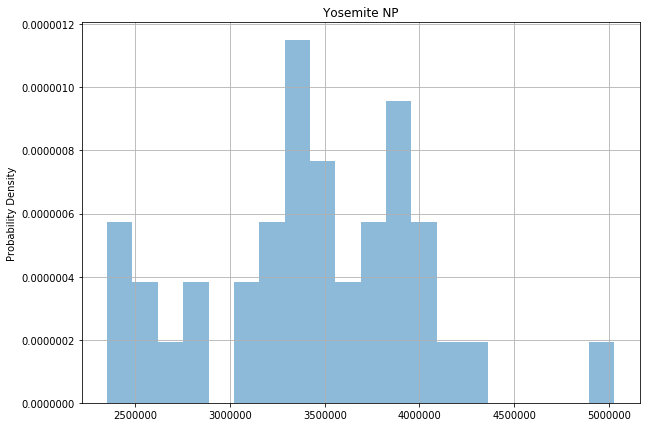

In [35]:
plot_hist_basic(y2,'Yosemite NP')

In [36]:
print(get_sample_mean_var(y2,'Yosemite NP'))

(3439902.358974359, 332341431721.34143)


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


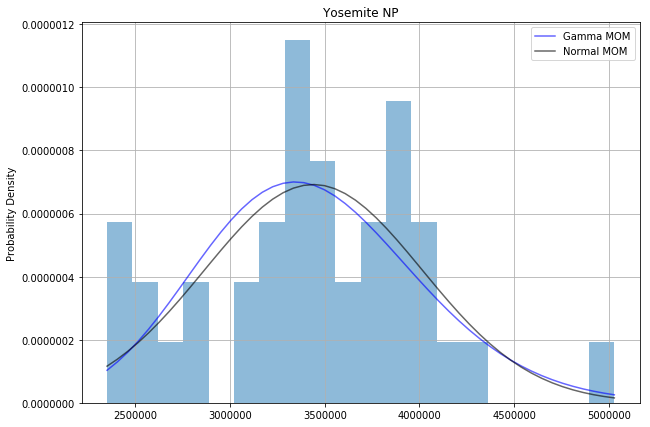

In [37]:
moms = methond_of_moments()
moms.fit(y2,'Yosemite NP')
moms.plot_pdf()


In [38]:
# Below code open a scatter plot using bokeh
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]


TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS,title="Yosemite visit distribution") # Title is the title of the  plot
p.xaxis.axis_label = 'Vists' # X-axis label
p.yaxis.axis_label = 'Distribution' # Y-axis label

# Generating the histogram using numpy histogram and passing in the values to the p.
hist, edges = np.histogram(y2['Yosemite NP'], density=True, bins=40)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], alpha=0.4)

output_file("yosemite_visit.html", title="Yosemite visit distribution")

show(p)

In [39]:
from bokeh.plotting import figure, output_file, show


p = figure(tools=TOOLS,title="Yosemite visit distribution",plot_width=800, plot_height=800) # Title is the title of the  plot
p.xaxis.axis_label = 'Year' # X-axis label
p.yaxis.axis_label = 'Total Visits' # Y-axis label

year = [i for i in range(1979,2017)]
visits = y2['Yosemite NP']

# add a line renderer
p.line(year, visits,line_color="orange", line_width=2, alpha=0.7, legend="Yosemite Recreational Visits")

# Disables the scientific numbers
p.left[0].formatter.use_scientific = False
p.below[0].formatter.use_scientific = False

output_file("yosemite_visit.html", title="Yosemite Recreational visits")

show(p)

/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 38), ('y', 39)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


In [40]:
y2

,Yosemite NP
1979_Recreational_Visits,2350782.0
1980_Recreational_Visits,2490282.0
1981_Recreational_Visits,2516893.0
1982_Recreational_Visits,2415587.0
1983_Recreational_Visits,2457464.0
1984_Recreational_Visits,2738467.0
1985_Recreational_Visits,2831952.0
1986_Recreational_Visits,2876717.0
1987_Recreational_Visits,3152275.0
1988_Recreational_Visits,3216681.0


In [41]:
rec_visits = recreational_visits.drop(columns=['Average_1998_2017_Recreational_Visits', 'Average_1979_1997_Recreational_Visits'])
rec_visits.head(5)

,Park Name,1998_Recreational_Visits,1999_Recreational_Visits,2000_Recreational_Visits,2001_Recreational_Visits,2002_Recreational_Visits,2003_Recreational_Visits,2004_Recreational_Visits,2005_Recreational_Visits,2006_Recreational_Visits,...,1988_Recreational_Visits,1989_Recreational_Visits,1990_Recreational_Visits,1991_Recreational_Visits,1992_Recreational_Visits,1993_Recreational_Visits,1994_Recreational_Visits,1995_Recreational_Visits,1996_Recreational_Visits,1997_Recreational_Visits
0,Abraham Lincoln Birthplace NHP,250842.0,251204.0,236180.0,229675.0,250772.0,211650.0,201828.0,190809.0,200054.0,...,288324.0,309823.0,307669.0,316945.0,302739.0,293710.0,279542.0,268509.0,249344.0,262889.0
1,Acadia NP,2594497.0,2602227.0,2469238.0,2516551.0,2558572.0,2431062.0,2207847.0,2051484.0,2083588.0,...,4502283.0,5440952.0,2339591.0,2475857.0,2382113.0,2656034.0,2710749.0,2845378.0,2704831.0,2760306.0
2,Adams NHP,63569.0,84574.0,87347.0,167500.0,173944.0,215659.0,239504.0,220467.0,225318.0,...,21617.0,22595.0,20315.0,26958.0,27400.0,43877.0,41179.0,47312.0,38230.0,56643.0
3,African Burial Ground NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Agate Fossil Beds NM,17594.0,18117.0,17933.0,17399.0,17129.0,16233.0,15235.0,14209.0,13521.0,...,11156.0,11459.0,14482.0,13891.0,18785.0,19467.0,18970.0,18719.0,16567.0,20596.0


In [42]:
rec_visits_new = rec_visits.reindex(sorted(rec_visits.columns), axis=1)
rec_visits_new.head(5)

,1979_Recreational_Visits,1980_Recreational_Visits,1981_Recreational_Visits,1982_Recreational_Visits,1983_Recreational_Visits,1984_Recreational_Visits,1985_Recreational_Visits,1986_Recreational_Visits,1987_Recreational_Visits,1988_Recreational_Visits,...,2009_Recreational_Visits,2010_Recreational_Visits,2011_Recreational_Visits,2012_Recreational_Visits,2013_Recreational_Visits,2014_Recreational_Visits,2015_Recreational_Visits,2016_Recreational_Visits,2017_Recreational_Visits,Park Name
0,271231.0,239074.0,252245.0,318707.0,256126.0,258023.0,264905.0,280620.0,292825.0,288324.0,...,221111.0,177122.0,163568.0,169515.0,163928.0,241264.0,148605.0,252495.0,269580,Abraham Lincoln Birthplace NHP
1,2787366.0,2779666.0,2997972.0,3572114.0,4124639.0,3734763.0,3745570.0,3929054.0,4288154.0,4502283.0,...,2227698.0,2504208.0,2374645.0,2431052.0,2254922.0,2563129.0,2811184.0,3303393.0,3509271,Acadia NP
2,34322.0,24974.0,27055.0,25440.0,26162.0,23398.0,24555.0,24693.0,25617.0,21617.0,...,253656.0,73339.0,219975.0,336031.0,285501.0,178468.0,183632.0,199301.0,255562,Adams NHP
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,117113.0,108585.0,77624.0,93234.0,54861.0,56348.0,46526.0,43182,African Burial Ground NM
4,8115.0,8330.0,9459.0,9018.0,10097.0,10317.0,10366.0,10187.0,11439.0,11156.0,...,12694.0,12509.0,11617.0,11824.0,10504.0,12440.0,13264.0,15555.0,32038,Agate Fossil Beds NM


In [43]:

yosemite_data = rec_visits[rec_visits['Park Name'] == 'Yosemite NP']
yosemite_visits = (yosemite_data.pivot_table(yosemite_data,index=["Yosemite NP"])).transpose()


zion_data = rec_visits[rec_visits['Park Name'] == 'Zion NP']
zion_visits = (zion_data.pivot_table(yosemite_data,index=["Zion NP"])).transpose()

yellowstone_data = rec_visits[rec_visits['Park Name'] == 'Yellowstone NP']
yellowstone_visits = (yellowstone_data.pivot_table(yosemite_data,index=["Yellowstone NP"])).transpose()

grandcanyon_data = rec_visits[rec_visits['Park Name'] == 'Grand Canyon NP']
grandcanyon_visits = (grandcanyon_data.pivot_table(yosemite_data,index=["Grand Canyon NP"])).transpose()

rockymoutain_data = rec_visits[rec_visits['Park Name'] == 'Rocky Mountain NP']
rockymoutain_visits = (rockymoutain_data.pivot_table(yosemite_data,index=["Rocky Mountain NP"])).transpose()

smokymountain_data = rec_visits[rec_visits['Park Name'] == 'Great Smoky Mountains NP']
smokymountain_visits = (smokymountain_data.pivot_table(yosemite_data,index=["Great Smoky Mountains NP"])).transpose()







# pd.pivot_table(data, index= 'Year', values= "Happiness Score")

# recreational_visits[recreational_visits['Park Name'] == 'Yosemite NP']
# yosemite_visits = rec_visits.pivot_table(rec_visits,values="Park Name")
#smokymountain_visits

In [50]:
from bokeh.plotting import figure, output_file, show


p = figure(tools=TOOLS,title="Park Recreational visit distribution",plot_width=800, plot_height=800) # Title is the title of the  plot
p.xaxis.axis_label = 'Year' # X-axis label
p.yaxis.axis_label = 'Total Visits' # Y-axis label

population_data = pd.read_csv('../data/population_data.csv')
sorted_pop = population_data.sort_values(by=['Year'])
population_data = sorted_pop['Population']

year = [i for i in range(1979,2017)]
yosemite_visit_data = yosemite_visits['Yosemite NP']
yellowstone_visit_data = yellowstone_visits['Yellowstone NP']
zion_visit_data = zion_visits['Zion NP']
grandcanyon_visit_data = grandcanyon_visits['Grand Canyon NP']
rockymountain_visit_data = rockymoutain_visits['Rocky Mountain NP']
smokymountain_visit_data = smokymountain_visits['Great Smoky Mountains NP']

# add a line renderer
p.line(year, yosemite_visit_data,line_color="orange", line_width=2, alpha=0.7, legend="Yosemite")
p.line(year, yellowstone_visit_data,line_color="red", line_width=2, alpha=0.7, legend="Yellow Stone")
p.line(year, zion_visit_data,line_color="blue", line_width=2, alpha=0.7, legend="Zion")
p.line(year, grandcanyon_visit_data,line_color="brown", line_width=2, alpha=0.7, legend="Grand Canyon")
p.line(year, rockymountain_visit_data,line_color="purple", line_width=2, alpha=0.7, legend="Rocky Mountain")
p.line(year, smokymountain_visit_data,line_color="green", line_width=2, alpha=0.7, legend="Great Smoky Mountains")
#p.line(year,population_data,line_color="black", line_width=2, alpha=0.7, legend="US Population")

# Disables the scientific numbers
p.left[0].formatter.use_scientific = False
p.below[0].formatter.use_scientific = False

output_file("recreational_visits.html", title="Recreational visits")

show(p)

/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 38), ('y', 39)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 38), ('y', 39)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 38), ('y', 39)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. C

In [74]:
from bokeh.core.properties import value
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import dodge




parks = ['Zion','Grand Canyon','Yellow Stone', 'Yosemite','Rocky Mountain']
camping_categories = ["tent", "backcountry"]
tent_overnight = [115902,154876,89504,498389,101125]
back_country_overnight = [35947,291984,41694,165206,37470]

data = {'parks' : parks,
        'tent'   : [115902,154876,89504,498389,101125],
        'backcountry'   : [35947,291984,41694,165206,37470]}


source = ColumnDataSource(data=data)

p = figure(x_range=parks, y_range=(0, 700000), plot_height=250, title="Camping Counts by Park",
           toolbar_location=None, tools="")

p.vbar(x=dodge('parks', -0.25, range=p.x_range), top='tent', width=0.2, source=source,
       color="#c9d9d3", legend=value("tent"))

p.vbar(x=dodge('parks',  0.0,  range=p.x_range), top='backcountry', width=0.2, source=source,
       color="#718dbf", legend=value("backcountry"))

# p.vbar(x=dodge('fruits',  0.25, range=p.x_range), top='2017', width=0.2, source=source,
#        color="#e84d60", legend=value("2017"))

p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

# Disables the scientific numbers
p.left[0].formatter.use_scientific = False
output_file("Camping_Counts.html")

show(p)